<a href="https://colab.research.google.com/github/mizhac/failure_analysis/blob/master/Task1/Analisis_de_fallas_tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inicializamos el proyecto importando las librerias a utilizar para el analisis de datos y generacion de diagramas.


*   **Pandas** para leer los datos del csv a analizar
*   **MatPlotLib** para generar un grafico que permita visualizar el diagrama de pareto.
*   **Files** para poder subir nuestro csv y gestionarlo de forma temporal






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from google.colab import files
import io

Ejecutamos la siguiente expresion para inicializar un gestor de archivos que nos permitira subir un archivo de tipo csv para gestionarlo de forma temporal.

In [ ]:
uploaded = files.upload()

Saving data-frecuencias-causa.csv to data-frecuencias-causa (3).csv


Creamos una variable llamada Eventos en donde se guardaran en memoria todos los datos obtenidos del archivo csv con nombre: ***data-frecuencias-causa.csv***

In [ ]:
Eventos = pd.read_csv(io.BytesIO(uploaded['data-frecuencias-causa.csv']))
# Ejecutamos la funcion .info para verificar que el archivo subido tiene los datos correctos.
Eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SÍNTOMA  81 non-null     object
 1   CAUSA    81 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


Para verificar que la data de nuestro archivo sea la correcta ejecutamos la funcion *.head()* que nos permitira visualizar los primeros 5 elementos de nuestras filas y sus respectivos nombres de columnas (**SINTOMA**, **CAUSA**)

In [ ]:
Eventos.head()

,SÍNTOMA,CAUSA
0,Descamación,Lubricación
1,Descamación,Instalación
2,Descamación,Instalación
3,Descamación en intervalo de bolas,Instalación
4,Descamación en la pista,Instalación


Nuestro siguiente paso (una vez que hayamos verificado que la data sea la correcta), es realizar un conteo de los valores frecuentes agrupados en base a las causas. Para ello utilizaremos la funcion *.value_counts()* que nos permitira agrupar por frecuencias absolutas de cada **Causa**

In [ ]:
Get_Frec = pd.value_counts(Eventos["CAUSA"])
# Imprimimos el valor del dataFrame Get_Frec para visualizar el resumen del conteo
Get_Frec

Lubricación               36
Instalación               19
Carga                     10
Condiciones eléctricas     6
Vibración                  5
Temperatura                3
Aceleraciones              2
Name: CAUSA, dtype: int64

Ahora pasaremos a salvaguardar el anterior conteo de valores en una tabla con 2 Columnas: **Causa** y **Frec_Absoluta** (Frecuencia Absoluta)

In [ ]:
Frec_Df = pd.DataFrame(Get_Frec)
Frec_Df.index.name = "Causa"
# Reasignamos el nonbre de la columna de frecuencias a Frec_Absoluta
Frec_Df.columns = ["Frec_absoluta"]
# Imprimimos el valor del dataFrame de Frecuencias para visualizar la nueva tabla a analizar
Frec_Df.head()

,Frec_absoluta
Causa,
Lubricación,36
Instalación,19
Carga,10
Condiciones eléctricas,6
Vibración,5


Pasamos a agregar una columna adicional en donde determinaremos la **frecuencia relativa** cuyo valor es determinado por el total de eventos de un tipo de causa respecto al total de eventos de todas las causas.

\begin{align}
        f_i = \frac{n_i}{N}
    \end{align}

In [ ]:
Frec_Df["Frec_relativa_%"] = round(100 * Frec_Df["Frec_absoluta"]/len(Eventos), 2)

Frec_Df

,Frec_absoluta,Frec_relativa_%
Causa,,
Lubricación,36,44.44
Instalación,19,23.46
Carga,10,12.35
Condiciones eléctricas,6,7.41
Vibración,5,6.17
Temperatura,3,3.70
Aceleraciones,2,2.47


Ahora que determinamos las frecuencias relativas por cada evento generamos una columna adicional que nos permita representar la cantidad de **frecuencias relativas acumuladas** para alcanzar el total de eventos.
Para ello utilizaremos una funcion ***for*** que nos permitira iterar una a una las frecuencias e internamente acumular sus valores para llegar al total.

In [ ]:
Frec_rel_val = Frec_Df["Frec_relativa_%"].values
Frec_Absolutas_Acum = []

Valor_Acum = 0


for frecuenciaRelativa in Frec_rel_val:
  Valor_Acum = Valor_Acum + frecuenciaRelativa
  Frec_Absolutas_Acum.append(Valor_Acum)

Frec_Df["Frec_relativa_%_acum"] = Frec_Absolutas_Acum

Frec_Df

,Frec_absoluta,Frec_relativa_%,Frec_relativa_%_acum
Causa,,,
Lubricación,36,44.44,44.44
Instalación,19,23.46,67.90
Carga,10,12.35,80.25
Condiciones eléctricas,6,7.41,87.66
Vibración,5,6.17,93.83
Temperatura,3,3.70,97.53
Aceleraciones,2,2.47,100.00


Una vez que nuestras operaciones hayan generado los resultados de frecuencias absolutas, frecuencias relativas y frecuencias relativas acumuladas paramos a configurar nuestro **diagrama de pareto**.

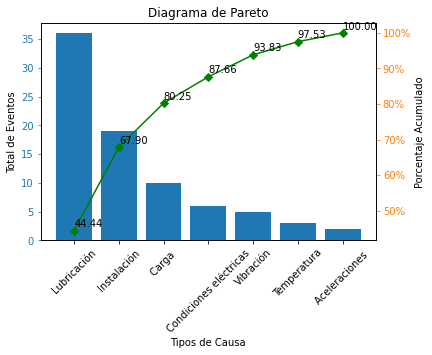

In [ ]:
InitFigure = plt.figure()

diagramAX = InitFigure.add_subplot(1,1,1)
diagramAX.bar(Frec_Df.index, Frec_Df["Frec_absoluta"], color="C0")

diagramBX = diagramAX.twinx()
diagramBX.plot(Frec_Df.index, Frec_Df["Frec_relativa_%_acum"], color="g", marker="D", ms=5)
diagramBX.yaxis.set_major_formatter(PercentFormatter())

diagramAX.tick_params(axis="y", colors="C0")
diagramBX.tick_params(axis="y", colors="C1")

diagramAX.set_xticklabels(Frec_Df.index, rotation=75)

for tick in diagramAX.get_xticklabels():
    tick.set_rotation(45)

elevation = 1
for i in range(len(Frec_Df["Frec_relativa_%_acum"])):
    diagramBX.annotate("%.2f" % Frec_Df["Frec_relativa_%_acum"][i], (Frec_Df.index[i], Frec_Df["Frec_relativa_%_acum"][i] + elevation))


diagramAX.set_title("Diagrama de Pareto")
diagramBX.set_ylabel('Porcentaje Acumulado')
diagramAX.set_ylabel('Total de Eventos')
diagramAX.set_xlabel('Tipos de Causa')

plt.show()